In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X,y = make_circles(n_samples = 100,noise=0.1,random_state=1)

<Axes: >

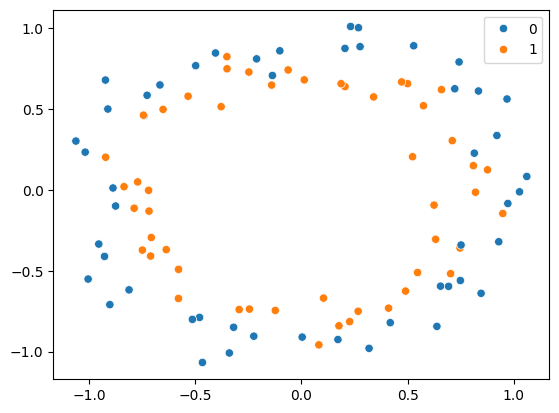

In [5]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [13]:
#Early Stopping
model = Sequential()

model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [16]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.4977 - loss: 0.6928 - val_accuracy: 0.5500 - val_loss: 0.6968
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4773 - loss: 0.6861 - val_accuracy: 0.4000 - val_loss: 0.7069
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5461 - loss: 0.6797 - val_accuracy: 0.4500 - val_loss: 0.7132
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5211 - loss: 0.6913 - val_accuracy: 0.4000 - val_loss: 0.7174
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5766 - loss: 0.6754 - val_accuracy: 0.5000 - val_loss: 0.7170
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5562 - loss: 0.6739 - val_accuracy: 0.4500 - val_loss: 0.7181
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4867 - loss: 0.6855 - val_accuracy: 0.4000 - val_loss: 0.7149
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5266 - loss: 0.6725 - val_accuracy: 0.3500 - 

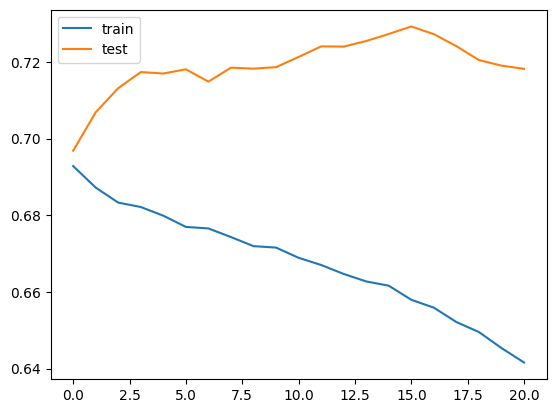

In [17]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


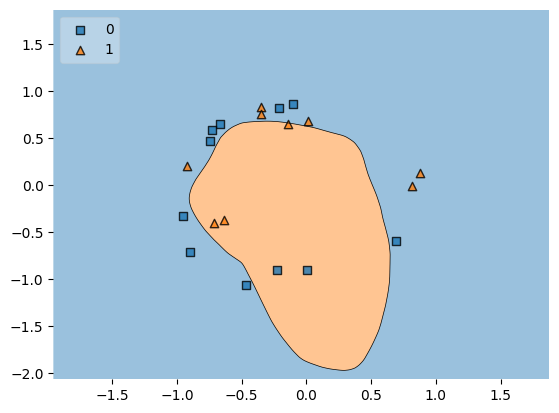

In [18]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()